# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Setting up my URL and query URL
# There was an issue where it was reading in metric so I converted it to imperial:
# https://openweathermap.org/current#format
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# Query URL:
query_url = url + "appid=" + api_key + "&q="
#requests.get(query_url + 'portland').json()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

625


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Lists
cityname = []
cityID = []
lat = []
lng = []
maxtemp = []
humidity = [] 
cloudiness = []
windspeed = []
country = []
date = []
# Counter
record = 0

print('''
Beginning Data Retrieval
------------------------
    ''')
#Probably going to run into fetching errors so this is where we may have to do try and except
for i in cities:
    try: 
        data_loop = requests.get(query_url + i).json()
        record += 1
        cityname.append(data_loop['name'])
        cityID.append(data_loop['id'])
        lat.append(data_loop['coord']['lat'])
        lng.append(data_loop['coord']['lon'])
        maxtemp.append(data_loop['main']['temp_max'])
        humidity.append(data_loop['main']['humidity'])
        cloudiness.append(data_loop['clouds']['all'])
        windspeed.append(data_loop['wind']['speed'])
        country.append(data_loop['sys']['country'])
        date.append(data_loop['dt'])
        print(f'Processing Record {record} for the city of: {i.title()}')
        #if record > 9: #will need to set this to 50 when I run the full report
            #record = 0
    except KeyError:
        print(f'City was not found for Record {record}...skipping to next line')
print('''
-----------------------
Data Retrieval Complete
-----------------------
''')

ng Record 220 for the city of: Abalak
Processing Record 221 for the city of: Letterkenny
Processing Record 222 for the city of: Gasa
Processing Record 223 for the city of: Quesnel
Processing Record 224 for the city of: Kaitangata
Processing Record 225 for the city of: Kasongo
Processing Record 226 for the city of: Kupang
City was not found for Record 227...skipping to next line
Processing Record 228 for the city of: Vila Franca Do Campo
City was not found for Record 229...skipping to next line
City was not found for Record 230...skipping to next line
Processing Record 231 for the city of: Khorramshahr
Processing Record 232 for the city of: Tefe
Processing Record 233 for the city of: Arvika
Processing Record 234 for the city of: Hay River
Processing Record 235 for the city of: Constitucion
Processing Record 236 for the city of: Puerto Escondido
Processing Record 237 for the city of: Uchiza
Processing Record 238 for the city of: Orlik
Processing Record 239 for the city of: Richards Bay
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {'City': cityname,'Lat':lat,'Lng':lng,'Max Temp': maxtemp,'Humidity':humidity,\
               'Cloudiness': cloudiness, 'Wind Speed':windspeed, 'Country': country, 'Date':date}
weather_df = pd.DataFrame(weather_dict)
#Conversion of time 
#weather_df['Date']=(pd.to_datetime(weather_df['Date'],unit='s')) 
#timestamp = weather_df['Date']
#export
weather_df.to_csv(r'Weather_DF.csv')

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barcelos,41.54,-8.62,51.80,71,75,13.87,PT,1607049940
1,San Quintín,30.48,-115.95,57.97,74,0,0.67,MX,1607049940
2,Mar del Plata,-38.00,-57.56,57.99,82,90,5.82,AR,1607049765
3,Ābu Road,24.48,72.78,73.67,29,0,2.53,IN,1607049940
4,Cape Town,-33.93,18.42,62.01,72,0,25.28,ZA,1607049902


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
highumid = weather_df.loc[(weather_df['Humidity']>100)]
highumid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
nohumidity_df = weather_df
humidindex = nohumidity_df[nohumidity_df['Humidity'] > 100 ].index

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=nohumidity_df.drop(humidindex, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barcelos,41.54,-8.62,51.80,71,75,13.87,PT,1607049940
1,San Quintín,30.48,-115.95,57.97,74,0,0.67,MX,1607049940
2,Mar del Plata,-38.00,-57.56,57.99,82,90,5.82,AR,1607049765
3,Ābu Road,24.48,72.78,73.67,29,0,2.53,IN,1607049940
4,Cape Town,-33.93,18.42,62.01,72,0,25.28,ZA,1607049902
...,...,...,...,...,...,...,...,...,...
571,Uray,60.12,64.78,13.84,96,89,4.79,RU,1607049994
572,Hualmay,-11.10,-77.61,65.03,82,99,5.19,PE,1607049994
573,Bjørnevatn,69.67,29.98,33.80,74,86,33.33,NO,1607049995
574,Port Moresby,-9.44,147.18,89.60,70,40,14.99,PG,1607049995


In [7]:
clean_city_data.to_csv(r'Clean City Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

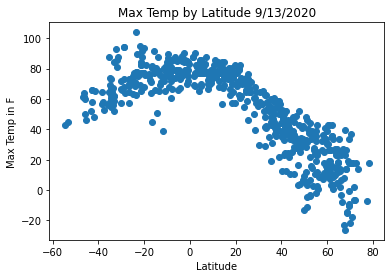

In [8]:
date = "9/13/2020"
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.xlabel("Latitude")
plt.ylabel("Max Temp in F")
plt.title("Max Temp by Latitude " + date )
plt.show()

## Latitude vs. Humidity Plot

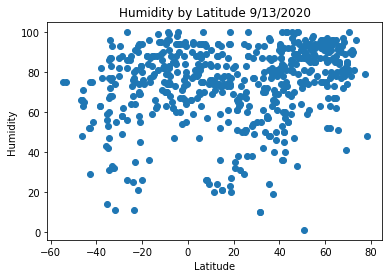

In [9]:
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']
plt.scatter(x_axis2, y_axis2)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity by Latitude " + date )
plt.show()

## Latitude vs. Cloudiness Plot

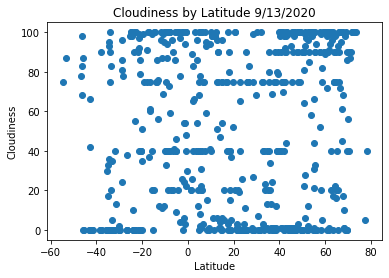

In [10]:
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']
plt.scatter(x_axis3, y_axis3)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude " + date )
plt.show()

## Latitude vs. Wind Speed Plot

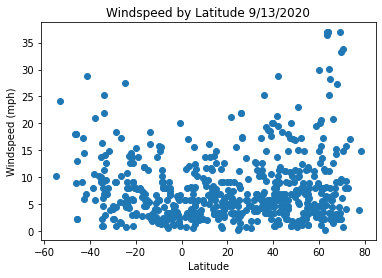

In [11]:
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']
plt.scatter(x_axis4, y_axis4)
#plot.scatter(kind="scatter", x="Latitude", y="Max Temp", grid=False, figsize=(6,5),
             # title="Testing")
# label
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.title("Windspeed by Latitude " + date )
plt.show()

## Linear Regression

In [12]:
def linfunct(x_values, y_values,title,xlabel,ylabel,i,l):
    #Stats will call from my variable above and then look for what ever argument I establish in ()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plot and format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,(i,l), fontsize=10,color="red")
    print(f'The correlation coefficient: {rvalue}')
    #label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

northern_df = weather_df.loc[(weather_df['Lat']>0.01)]
southern_df = weather_df.loc[(weather_df['Lat']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: -0.8913096825066472


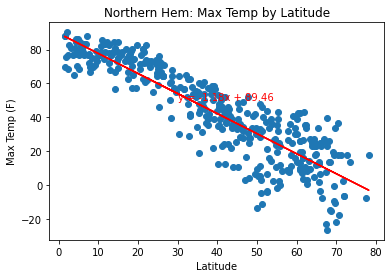

In [13]:
linfunct(northern_df["Lat"],northern_df['Max Temp'],\
         title="Northern Hem: Max Temp by Latitude",xlabel = "Latitude", ylabel = "Max Temp (F)", i=30,l=50)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient: 0.5423856984861475


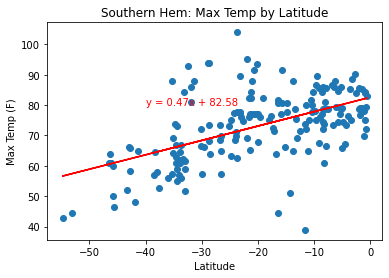

In [14]:
linfunct(southern_df['Lat'],southern_df['Max Temp']\
         ,title="Southern Hem: Max Temp by Latitude",xlabel = "Latitude", ylabel = "Max Temp (F)",i=-40,l=80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: 0.2554989657610126


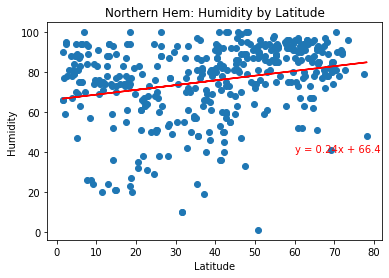

In [15]:
linfunct(northern_df['Lat'],northern_df['Humidity'],\
         title="Northern Hem: Humidity by Latitude",xlabel = "Latitude", ylabel = "Humidity", i=60,l=40)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient: 0.3415873638191228


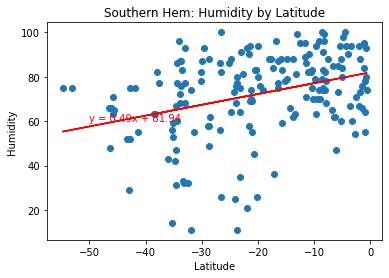

In [16]:
linfunct(southern_df['Lat'],southern_df['Humidity'],title="Southern Hem: Humidity by Latitude",\
         xlabel = "Latitude", ylabel = "Humidity", i=-50,l=60)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.1961841207934018


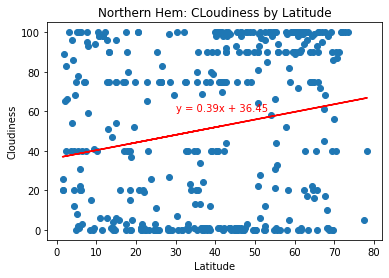

In [17]:
linfunct(northern_df['Lat'],northern_df['Cloudiness'],title="Northern Hem: CLoudiness by Latitude",\
         xlabel = "Latitude", ylabel = "Cloudiness", i=30,l=60)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient: 0.2620014818317456


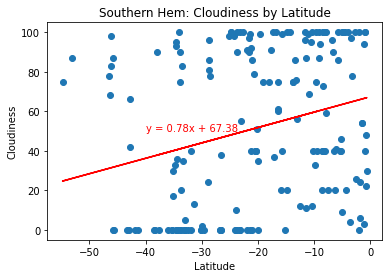

In [18]:
linfunct(southern_df['Lat'],southern_df['Cloudiness'],title="Southern Hem: Cloudiness by Latitude",\
         xlabel = "Latitude", ylabel = "Cloudiness",i=-40,l=50)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: 0.2073113202021136


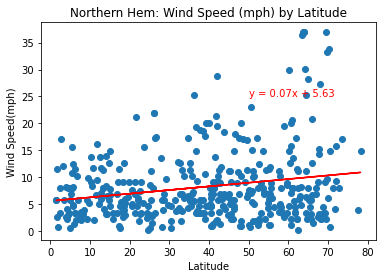

In [19]:
linfunct(northern_df['Lat'],northern_df['Wind Speed'],title="Northern Hem: Wind Speed (mph) by Latitude",\
         xlabel = "Latitude", ylabel = "Wind Speed(mph)", i=50,l=25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient: -0.3856520516529062


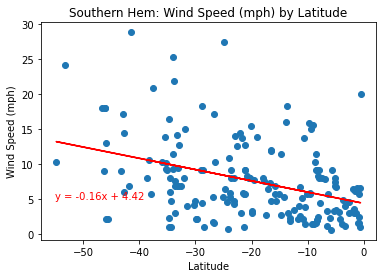

In [20]:
linfunct(southern_df['Lat'],southern_df['Wind Speed'],title="Southern Hem: Wind Speed (mph) by Latitude",\
         xlabel = "Latitude", ylabel = "Wind Speed (mph)",i=-55,l=5)